In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from src import gauss_jacobi

ModuleNotFoundError: No module named 'src'

In [29]:
# -*- coding: utf-8 -*-

"""
Python 3
19 / 07 / 2024
@author: z_tjona

"I find that I don't understand things unless I try to program them."
-Donald E. Knuth
"""

# ----------------------------- logging --------------------------
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np


# ####################################################################
def gauss_jacobi(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> np.array:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Jacobi.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """

    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()
    tray = [x.copy()]
    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new, tray

        x = x_new.copy()
        tray.append(x.copy())
        logging.info(f"i= {k} x: {x.T}")

    return x, tray


# ####################################################################
def gauss_seidel(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> np.array:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Gauss-Seidel.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()
    tray = [x.copy()]

    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x_new[j] for j in range(i) if j != i]) + sum(
                [A[i, j] * x[j] for j in range(i, n) if j != i]
            )
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new, tray

        x = x_new.copy()
        tray.append(x.copy())
        logging.info(f"i= {k} x: {x.T}")

    return x, tray


[01-25 13:04:39][INFO] 2025-01-25 13:04:39.650466


# *Taller-05 Gauss-Jacobi Gauss-Seidel*
## *Métodos Numéricos*
## Aubertin Ochoa
## 25/01/2025

In [49]:
import numpy as np 
import matplotlib.pyplot as plt


# Converge
A = np.array([[3, 2], [2, 10]])

# Diverge
# A = np.array([[2, 10], [3, 2]])
b = np.array([16, 11])
x0 = np.array([1,1])
tol = 1e-6
max_iter = 1000

solucionJacobi, Jacobi = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

print("Solución del sistema:")
for i, valor in enumerate(solucionJacobi.flatten()):
    print(f"x{i + 1} = {valor:.6f}")

[01-25 13:34:09][INFO] i= 0 x: [1 1]
[01-25 13:34:09][INFO] i= 1 x: [[4.66666667 0.9       ]]
[01-25 13:34:09][INFO] i= 2 x: [[4.73333333 0.16666667]]
[01-25 13:34:09][INFO] i= 3 x: [[5.22222222 0.15333333]]
[01-25 13:34:09][INFO] i= 4 x: [[5.23111111 0.05555556]]
[01-25 13:34:09][INFO] i= 5 x: [[5.2962963  0.05377778]]
[01-25 13:34:09][INFO] i= 6 x: [[5.29748148 0.04074074]]
[01-25 13:34:09][INFO] i= 7 x: [[5.30617284 0.0405037 ]]
[01-25 13:34:09][INFO] i= 8 x: [[5.30633086 0.03876543]]
[01-25 13:34:09][INFO] i= 9 x: [[5.30748971 0.03873383]]
[01-25 13:34:09][INFO] i= 10 x: [[5.30751078 0.03850206]]
[01-25 13:34:09][INFO] i= 11 x: [[5.30766529 0.03849784]]
[01-25 13:34:09][INFO] i= 12 x: [[5.3076681  0.03846694]]
[01-25 13:34:09][INFO] i= 13 x: [[5.30768871 0.03846638]]
[01-25 13:34:09][INFO] i= 14 x: [[5.30768908 0.03846226]]
[01-25 13:34:09][INFO] i= 15 x: [[5.30769183 0.03846218]]
Solución del sistema:
x1 = 5.307692
x2 = 0.038462


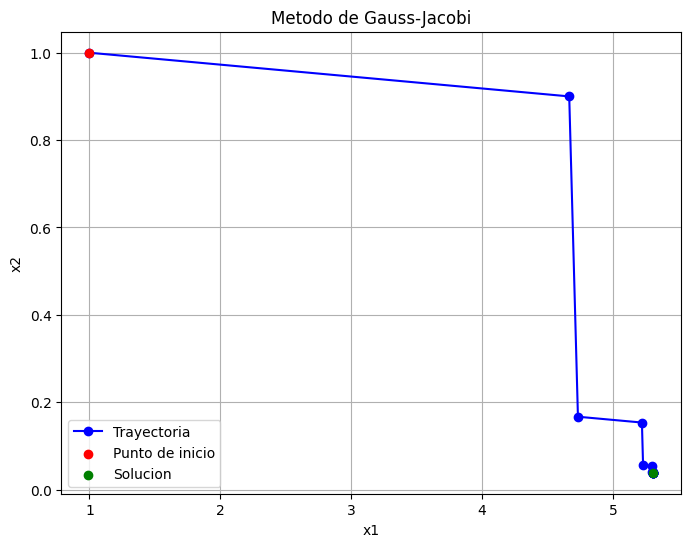

In [31]:
Jacobi = np.array([x.flatten() for x in Jacobi])
# Graficar
plt.figure(figsize=(8, 6))
plt.plot(Jacobi[:, 0], Jacobi[:, 1], marker='o', color='b', label='Trayectoria')
plt.scatter(x0[0], x0[1], color='r', label='Punto de inicio', zorder=5)
plt.scatter(solucionJacobi[0], solucionJacobi[1], color='g', label='Solucion', zorder=5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Metodo de Gauss-Jacobi')

plt.legend()
plt.grid(True)
plt.show()

# #Zoom
# plt.xlim(-3, 0.0)  # Rango para el eje x 
# plt.ylim(-1.0, 5)  # Rango para el eje y 


---

## Con valores $x_0 = [5, -2]$

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Converge
A1 = np.array([[3, 2], [2, 10]])

# Diverge
# A2 = np.array([[2, 10], [3, 2]])
b1 = np.array([16, 11])
x0_1 = np.array([5, -2])
tol1 = 1e-6
max_iter1 = 1000

solucionJacobix0_1, Jacobix0_1 = gauss_jacobi(A=A1, b=b1, x0=x0_1, tol=tol1, max_iter=max_iter1)

print("Solución del sistema:")
for i, valor in enumerate(solucionJacobix0_1.flatten()):
    print(f"x{i + 1} = {valor:.6f}")

[01-25 13:04:52][INFO] i= 0 x: [ 5 -2]
[01-25 13:04:52][INFO] i= 1 x: [[6.66666667 0.1       ]]
[01-25 13:04:52][INFO] i= 2 x: [[ 5.26666667 -0.23333333]]
[01-25 13:04:52][INFO] i= 3 x: [[5.48888889 0.04666667]]
[01-25 13:04:52][INFO] i= 4 x: [[5.30222222e+00 2.22222222e-03]]
[01-25 13:04:52][INFO] i= 5 x: [[5.33185185 0.03955556]]
[01-25 13:04:52][INFO] i= 6 x: [[5.30696296 0.03362963]]
[01-25 13:04:52][INFO] i= 7 x: [[5.31091358 0.03860741]]
[01-25 13:04:52][INFO] i= 8 x: [[5.30759506 0.03781728]]
[01-25 13:04:52][INFO] i= 9 x: [[5.30812181 0.03848099]]
[01-25 13:04:52][INFO] i= 10 x: [[5.30767934 0.03837564]]
[01-25 13:04:52][INFO] i= 11 x: [[5.30774957 0.03846413]]
[01-25 13:04:52][INFO] i= 12 x: [[5.30769058 0.03845009]]
[01-25 13:04:52][INFO] i= 13 x: [[5.30769994 0.03846188]]
[01-25 13:04:52][INFO] i= 14 x: [[5.30769208 0.03846001]]
[01-25 13:04:52][INFO] i= 15 x: [[5.30769333 0.03846158]]
[01-25 13:04:52][INFO] i= 16 x: [[5.30769228 0.03846133]]
Solución del sistema:
x1 = 5.307

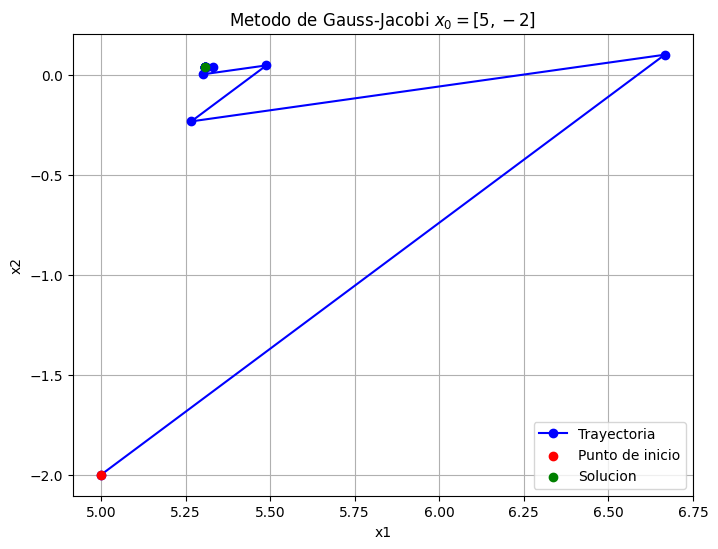

In [33]:
Jacobix0_1 = np.array([x.flatten() for x in Jacobix0_1])
# Graficar
plt.figure(figsize=(8, 6))
plt.plot(Jacobix0_1[:, 0], Jacobix0_1[:, 1], marker='o', color='b', label='Trayectoria')
plt.scatter(x0_1[0], x0_1[1], color='r', label='Punto de inicio', zorder=5)
plt.scatter(solucionJacobix0_1[0], solucionJacobix0_1[1], color='g', label='Solucion', zorder=5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Metodo de Gauss-Jacobi $x_0 = [5, -2]$')

plt.legend()
plt.grid(True)
plt.show()

# #Zoom
# plt.xlim(-3, 0.0)  # Rango para el eje x 
# plt.ylim(-1.0, 5)  # Rango para el eje y 

# Gauss-Seidel

In [47]:
# Converge
#A2 = np.array([[3, 2], [2, 10]])

# Diverge
A2 = np.array([[2, 10], [3, 2]])
b2 = np.array([11, 16])
x0_2 = np.array([1, 1])
tol2 = 1e-6
max_iter2 = 1000

solucionSeidel2, seidel2 = gauss_seidel(A=A2, b=b2, x0=x0_2, tol=tol2, max_iter=max_iter2)

print("Solución del sistema:")
for i, valor in enumerate(solucionSeidel2.flatten()):
    print(f"x{i + 1} = {valor:.6f}")

[01-25 13:32:57][INFO] i= 0 x: [1 1]
[01-25 13:32:57][INFO] i= 1 x: [[0.5  7.25]]
[01-25 13:32:57][INFO] i= 2 x: [[-30.75   54.125]]
[01-25 13:32:57][INFO] i= 3 x: [[-265.125   405.6875]]
[01-25 13:32:57][INFO] i= 4 x: [[-2022.9375   3042.40625]]
[01-25 13:32:57][INFO] i= 5 x: [[-15206.53125   22817.796875]]
[01-25 13:32:57][INFO] i= 6 x: [[-114083.484375   171133.2265625]]
[01-25 13:32:57][INFO] i= 7 x: [[-855660.6328125  1283498.94921875]]
[01-25 13:32:57][INFO] i= 8 x: [[-6417489.24609375  9626241.86914062]]
[01-25 13:32:57][INFO] i= 9 x: [[-48131203.84570312  72196813.76855469]]
[01-25 13:32:57][INFO] i= 10 x: [[-3.60984063e+08  5.41476103e+08]]
[01-25 13:32:57][INFO] i= 11 x: [[-2.70738051e+09  4.06107077e+09]]
[01-25 13:32:57][INFO] i= 12 x: [[-2.03053539e+10  3.04580308e+10]]
[01-25 13:32:57][INFO] i= 13 x: [[-1.52290154e+11  2.28435231e+11]]
[01-25 13:32:57][INFO] i= 14 x: [[-1.14217615e+12  1.71326423e+12]]
[01-25 13:32:57][INFO] i= 15 x: [[-8.56632116e+12  1.28494817e+13]]
[0

C:\Users\auber\AppData\Local\Temp\ipykernel_11656\2892209730.py:121: RuntimeWarning: overflow encountered in multiply
  suma = sum([A[i, j] * x_new[j] for j in range(i) if j != i]) + sum(
C:\Users\auber\AppData\Local\Temp\ipykernel_11656\2892209730.py:126: RuntimeWarning: invalid value encountered in subtract
  if np.linalg.norm(x_new - x) < tol:


[01-25 13:32:58][INFO] i= 554 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 555 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 556 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 557 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 558 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 559 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 560 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 561 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 562 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 563 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 564 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 565 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 566 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 567 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 568 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 569 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 570 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 571 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 572 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 573 x: [[-inf  inf]]
[01-25 13:32:58][INFO] i= 574 x: [[-inf  inf]]
[01-25 13:32:

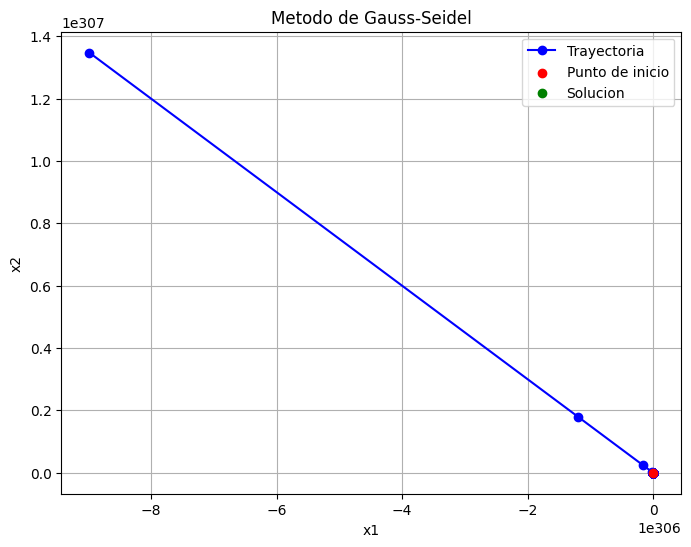

In [48]:
seidel2 = np.array([x.flatten() for x in seidel2])
# Graficar
plt.figure(figsize=(8, 6))
plt.plot(seidel2[:, 0], seidel2[:, 1], marker='o', color='b', label='Trayectoria')
plt.scatter(x0_2[0], x0_2[1], color='r', label='Punto de inicio', zorder=5)
plt.scatter(solucionSeidel2[0], solucionSeidel2[1], color='g', label='Solucion', zorder=5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Metodo de Gauss-Seidel')

plt.legend()
plt.grid(True)
plt.show()

---

## Con valores $x_0 = [5, -2]$

In [42]:
# Converge
#A3 = np.array([[3, 2], [2, 10]])

# Diverge
A3 = np.array([[2, 10], [3, 2]])
b3 = np.array([11, 16])
x0_3 = np.array([5, -2])
tol3 = 1e-6
max_iter3 = 1000

solucionSeidelx0_3, seidelx0_3 = gauss_seidel(A=A3, b=b3, x0=x0_3, tol=tol3, max_iter=max_iter3)

print("Solución del sistema:")
for i, valor in enumerate(solucionSeidelx0_3.flatten()):
    print(f"x{i + 1} = {valor:.6f}")

[01-25 13:08:13][INFO] i= 0 x: [ 5 -2]
[01-25 13:08:13][INFO] i= 1 x: [[ 15.5  -15.25]]
[01-25 13:08:13][INFO] i= 2 x: [[  81.75  -114.625]]
[01-25 13:08:13][INFO] i= 3 x: [[ 578.625  -859.9375]]
[01-25 13:08:13][INFO] i= 4 x: [[ 4305.1875  -6449.78125]]
[01-25 13:08:13][INFO] i= 5 x: [[ 32254.40625  -48373.609375]]
[01-25 13:08:13][INFO] i= 6 x: [[ 241873.546875  -362802.3203125]]
[01-25 13:08:13][INFO] i= 7 x: [[ 1814017.1015625  -2721017.65234375]]
[01-25 13:08:13][INFO] i= 8 x: [[ 13605093.76171875 -20407632.64257812]]
[01-25 13:08:13][INFO] i= 9 x: [[ 1.02038169e+08 -1.53057245e+08]]
[01-25 13:08:13][INFO] i= 10 x: [[ 7.65286231e+08 -1.14792934e+09]]
[01-25 13:08:13][INFO] i= 11 x: [[ 5.73964670e+09 -8.60947004e+09]]
[01-25 13:08:13][INFO] i= 12 x: [[ 4.30473502e+10 -6.45710253e+10]]
[01-25 13:08:13][INFO] i= 13 x: [[ 3.22855126e+11 -4.84282690e+11]]
[01-25 13:08:13][INFO] i= 14 x: [[ 2.42141345e+12 -3.63212017e+12]]
[01-25 13:08:13][INFO] i= 15 x: [[ 1.81606009e+13 -2.72409013e+1

C:\Users\auber\AppData\Local\Temp\ipykernel_11656\2892209730.py:122: RuntimeWarning: overflow encountered in multiply
  [A[i, j] * x[j] for j in range(i, n) if j != i]
C:\Users\auber\AppData\Local\Temp\ipykernel_11656\2892209730.py:126: RuntimeWarning: invalid value encountered in subtract
  if np.linalg.norm(x_new - x) < tol:


[01-25 13:08:14][INFO] i= 487 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 488 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 489 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 490 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 491 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 492 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 493 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 494 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 495 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 496 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 497 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 498 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 499 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 500 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 501 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 502 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 503 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 504 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 505 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 506 x: [[ inf -inf]]
[01-25 13:08:14][INFO] i= 507 x: [[ inf -inf]]
[01-25 13:08:

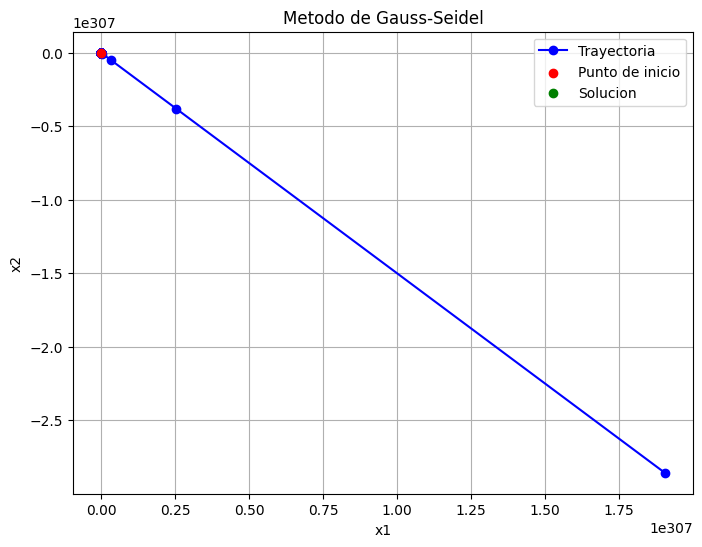

In [43]:
seidelx0_3 = np.array([x.flatten() for x in seidelx0_3])
# Graficar
plt.figure(figsize=(8, 6))
plt.plot(seidelx0_3[:, 0], seidelx0_3[:, 1], marker='o', color='b', label='Trayectoria')
plt.scatter(x0_3[0], x0_3[1], color='r', label='Punto de inicio', zorder=5)
plt.scatter(solucionSeidelx0_3[0], solucionSeidelx0_3[1], color='g', label='Solucion', zorder=5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Metodo de Gauss-Seidel')

plt.legend()
plt.grid(True)
plt.show()